<a href="https://colab.research.google.com/github/aspmirlab/ModRecHub/blob/master/FaceRecognitionNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
# Accessing My Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Import Packages
import os
import numpy as np
import glob
import shutil
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

np.set_printoptions(precision=4)

In [ ]:
#Show the classes in the dataset
base_dir = '/content/drive/My Drive/Colab Notebooks/Students' #/content/drive/My Drive/Colab Notebooks/PythonTeamHackathon2/Students
strClasses = os.listdir(base_dir)
print(strClasses)

['.DS_Store', '17CG023196', '16CF020569', '16CF020551', '16CK020823', '16CD021621', '16CF020556', '16CM021026', '17CG023165', '16CN021113', '16CN021114', '15CM03110', '17CG023198', '16CM021021', '16CK020815', '17CH023228', '16CI020624', '16CJ020727', '16CI020612', '16CM021028', '17CG023153', '16CJ020716', '16CF020567', '17CG023154', '16CM021017', '16CJ020729', '16CN021122', '16CF020558', '16CI020623', '16CK020812', '16CN021125', '16CB021300', '16CM021044', '16CJ020742', '17CH023244', '16CH021600', '17CE023356', '16CF020533', '16CI020677', 'ESOR KYZELEVOH', 'MOGBELU EMMANUEL FOTEBASE', '16CI020670', '16CM021043', '17CE023369', 'Daniema', 'DAMIENA', '16CF020534', '16CM020995', '16CI020648', '16CK020846', '17CQ023015', '17CH023281', '17CH023288', '16CI020679', '16CF020502', '16CK020883', '17CG023131', '16CL021540', '16CB021331', '17CE023367', '17CE023393', '17CE023358', '16CK020877', '17CH023286', '17CE023394', '16CB021336', '16CL021547', '17CQ023024', '17CE023360', 'ONUCHUKWU VICTOR', '1

In [ ]:
len(strClasses)

749

In [ ]:
#Load Dataset, Show the path and number of images in each class
for j in strClasses:
    img_path = os.path.join(base_dir,j)   
    imgDataset = glob.glob(img_path + '/*.jpg')
    #print (j)
    #print (imgDataset)
    #print (len(imgDataset))
    #plt.show(imgDataset)
    #print ('(): () Images'.format(j,len(imgDataset)))
    #Partition the dataset
    numTrain = int(round(len(imgDataset)*0.8))
    #train = imgDataset[:numTrain]      
    #val = imgDataset[numTrain:] 
  

In [ ]:
#Batch Size and Image Shape
batchSize = 100
imgShape = 150

In [ ]:
def plotImages(imgArray):
    fig, axes = plt.subplots(1,5,figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(imgArray, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show
    

In [ ]:
imgGenTrain = ImageDataGenerator(
                rescale=1./255,
                rotation_range=45,
                width_shift_range=.15,
                height_shift_range=.15,
                horizontal_flip=True,
                zoom_range = 0.5,
                validation_split=0.2
                )

In [ ]:
trainDataGen = imgGenTrain.flow_from_directory(
                    '/content/drive/My Drive/Colab Notebooks/Students/',
                    batch_size=batchSize,
                    shuffle=True,
                    target_size=(imgShape,imgShape),
                    class_mode='sparse')
                    #save_to_dir='/content/drive/My Drive/Colab Notebooks/PythonTeamHackathon2/TrainingData' # /content/drive/My Drive/Colab Notebooks/PythonTeamHackathon2/TrainingData



Found 749 images belonging to 748 classes.


In [ ]:
imgGenTest = ImageDataGenerator(
              rescale=1./255,
              rotation_range=45,
              width_shift_range=.15,
              height_shift_range=.15,
              horizontal_flip=True,
              zoom_range = 0.5
              )

valDataGen = imgGenTest.flow_from_directory(
        '/content/drive/My Drive/Colab Notebooks/Students/',
        target_size=(imgShape,imgShape),
        batch_size = batchSize,
        class_mode='sparse'
        #save_to_dir='/content/drive/My Drive/Colab Notebooks/PythonTeamHackathon2/ValidationData'
        )


Found 749 images belonging to 748 classes.


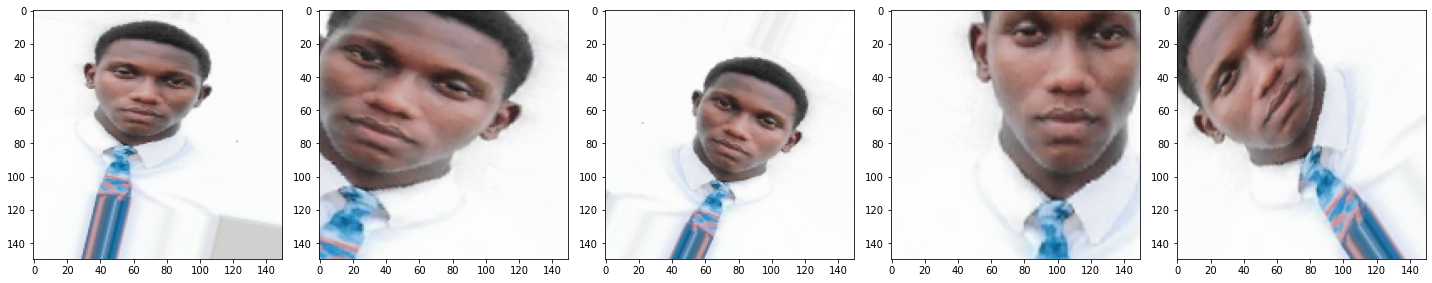

In [ ]:
augmentedImages = [trainDataGen[0][0][0] for i in range(5)]
plotImages(augmentedImages)

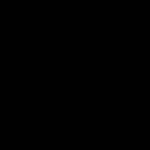

In [ ]:
img_1 = trainDataGen[0][0][0]
cv2_imshow(img_1)

In [ ]:
img_1.shape

(150, 150, 3)

In [ ]:
def create_model():
  #Create a sequential CNN Model
  model = Sequential()
  model.add(Conv2D(16,(3,3), padding='same', activation='relu', input_shape = (imgShape,imgShape,3)))
  model.add(MaxPooling2D(pool_size=(2,2)))

  model.add(Conv2D(32,3, padding='same', activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))

  model.add(Conv2D(64,3, padding='same', activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))

  model.add(Flatten())
  model.add(Dropout(0.2))
  model.add(Dense(512,activation = 'relu'))

  model.add(Dropout(0.2))
  model.add(Dense(772))

  model.summary()
  return model

In [ ]:
##def train_model():
model = create_model()
#Compile the model
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
#model.compile(optimizer='adam', loss=tf.keras.loss.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
model.compile(optimizer='adam',loss=loss_fn,metrics=['accuracy'])
#model.compile(optimizer='adam',metrics=['accuracy'])

#Train model
numEpoch = 130
modelHistory = model.fit_generator(
              trainDataGen,
              steps_per_epoch = int(np.ceil(trainDataGen.n/float(batchSize))), # 2000
              epochs = numEpoch,
              #batch_size=batchSize,
              validation_data = valDataGen,
              validation_steps = int(np.ceil(valDataGen.n/float(batchSize)))            
              )
#return modelHistory,model

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 18, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 20736)             0

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/130
8/8 [==============================] - 274s 29s/step - loss: 6.8244 - accuracy: 0.0000e+00 - val_loss: 6.6479 - val_accuracy: 0.0013
Epoch 2/130
8/8 [==============================] - 11s 1s/step - loss: 6.6491 - accuracy: 0.0047 - val_loss: 6.6480 - val_accuracy: 0.0027
Epoch 3/130
8/8 [==============================] - 11s 1s/step - loss: 6.6485 - accuracy: 0.0032 - val_loss: 6.6477 - val_accuracy: 0.0027
Epoch 4/130
8/8 [==============================] - 11s 1s/step - loss: 6.6480 - accuracy: 0.0025 - val_loss: 6.6456 - val_accuracy: 0.0027
Epoch 5/130
8/8 [==============================] - 11s 1s/step - loss: 6.6450 - accuracy: 0.0020 - val_loss: 6.6364 - val_accuracy: 0.0027
Epoch 6/130
8/8 [==============================] - 11s 1s/step - loss: 6.6346 - accuracy: 0.0019 - val_loss: 6.6013 - val_accuracy: 0.0027
Epoch 7/130
8/8 [==============================] - 11s 1s/step - loss: 6.5900 - accuracy: 0.0031 - val_loss: 6.5311 - val_accuracy: 0.0040
Epoch 8/130
8/8 [====

Training Accuracy =  [ 0.      0.1335  0.1335  0.267   0.267   0.267   0.267   0.4005  0.4005
  0.534   0.9346  1.0681  1.3351  1.4686  2.1362  2.1362  2.6702  4.0053
  2.9372  6.008   5.0734  6.9426  9.2123  7.6101 10.5474 11.6155 12.4166
 15.8879 16.9559 20.6943 18.8251 22.8304 23.231  26.1682 25.2336 27.9039
 31.2417 31.3752 34.3124 32.4433 38.1842 37.1162 40.1869 42.0561 40.988
 45.3939 49.1322 50.2003 50.2003 48.1976 55.8077 50.0668 52.737  55.0067
 55.5407 56.4753 57.1429 58.478  57.5434 60.2136 57.6769 61.2817 65.9546
 62.3498 65.8211 64.6195 62.3498 66.7557 64.6195 67.1562 67.0227 64.6195
 67.0227 67.0227 71.1616 70.761  71.2951 72.4967 74.7664 69.9599 71.2951
 72.7637 73.1642 75.8344 74.3658 76.3685 77.8371 75.968  78.5047 78.5047
 77.9706 76.1015 74.8999 78.3712 81.3084 79.3057 81.8425 79.5728 82.777
 80.1068 82.777  83.9786 82.243  83.4446 80.7744 82.777  79.9733 81.5754
 79.1722 78.3712 80.9079 80.5073 80.9079 84.1121 83.7116 86.7824 83.1776
 83.0441 83.9786 85.5808 85.0467

<function matplotlib.pyplot.show>

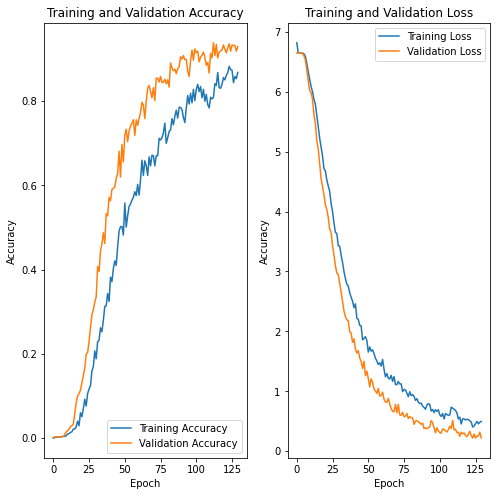

In [ ]:
#Plot Accuracy and Loss Graphs
acc = modelHistory.history['accuracy']
val_acc = modelHistory.history['val_accuracy']

print('Training Accuracy = ',(np.multiply(acc,100)))
print('')
print('Validation Accuracy = ', (np.multiply(val_acc,100)))

loss = modelHistory.history['loss']
val_loss = modelHistory.history['val_loss']

epochs_range = range(numEpoch)

plt.figure(figsize =(8,8))

plt.subplot(1,2,1)
plt.plot(epochs_range,acc,label='Training Accuracy')
plt.plot(epochs_range,val_acc,label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range,loss,label='Training Loss')
plt.plot(epochs_range,val_loss,label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.show




In [ ]:
#Evaluate and save the model
test_loss, test_acc = model.evaluate(valDataGen, verbose=2)  #model.evaluate(test_images,  test_labels, verbose=2)
print('')
print('Testing Accuracy')
print(test_acc * 100)
print('')
print('Testing Loss')
print(test_loss)
#Save the created and trained model
model.save("/content/drive/My Drive/Colab Notebooks/facerec_model")
#This model can be called with the following syntax
#myfacerec_model=keras.models.load_model("facerec_model")  

8/8 - 5s - loss: 0.2574 - accuracy: 0.9292

Testing Accuracy
92.92389750480652

Testing Loss
0.2573845684528351
INFO:tensorflow:Assets written to: /content/drive/My Drive/Colab Notebooks/facerec_model/assets


In [ ]:
#Load new picture to predict a person
import PIL
import PIL.Image
import pathlib

#dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
base_dir = '/content/drive/My Drive/Colab Notebooks/PredictData' #/content/drive/My Drive/Colab Notebooks/PythonTeamHackathon2/Students
data_dir = pathlib.Path(base_dir)

image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

#Batch Size and Image Shape
batchSize = 100
imgShape = 150

#Load these images off disk using image_dataset_from_directory.
testDataset = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  image_size=(imgShape, imgShape),
  batch_size=batchSize)




6
Found 6 files belonging to 3 classes.


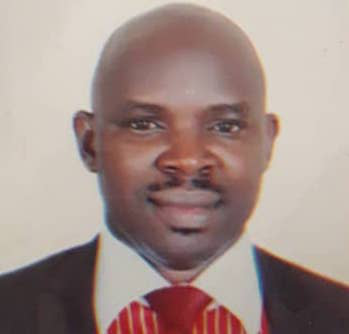

In [ ]:
preData = list(data_dir.glob('EA/*'))
PIL.Image.open(str(preData[0]))

#preData1 = list(data_dir.glob('MAGANI JOSHUA/*'))
#PIL.Image.open(str(preData1[0]))

#preData2 = list(data_dir.glob('12CI02776/*'))
#PIL.Image.open(str(preData2[0]))

In [ ]:
#Predict with new image
class_labels = testDataset.class_names #Obtain the target label
print(class_labels)
print('')
pred_labels = model.predict(testDataset)
# pred_labels = np.argmax(model.predict(testDataset), axis=-1)
# pred_labels = model.predict(testDataset)
# pred_labels = pred_labels.argmax()
# pred_labels = np.argmax(model.predict_classes(testDataset), axis=-1)
print(pred_labels)


['12CI02776', 'EA', 'MAGANI JOSHUA']

[[ -6859.766  -20718.617   -9093.456  ... -14059.561  -13053.068
  -12885.059 ]
 [ -8656.424   -7862.171   -6237.0474 ...  -8547.155   -8020.093
   -8028.8228]
 [ -5867.7334 -18825.588   -9177.792  ... -12676.627  -12094.17
  -11606.126 ]
 [ -6271.857  -11834.129   -4873.5664 ...  -8874.083   -8456.191
   -8695.927 ]
 [ -9887.727  -11293.272   -6476.7915 ...  -8733.866   -9023.727
   -8705.321 ]
 [ -8803.021  -17453.746  -10210.093  ...  -9804.311   -9875.4795
  -10041.735 ]]


In [ ]:
print(testDataset)

<BatchDataset shapes: ((None, 150, 150, 3), (None,)), types: (tf.float32, tf.int32)>


In [ ]:
classIndices = trainDataGen.class_indices 
#print(classIndices)

In [ ]:
#print(pred_labels[0])

In [ ]:
#Function to retrieve the matric number or name of the predicted label
def get_label_key(val): 
    for key, value in classIndices.items(): 
         if val == value: 
             return key 
  
    return "Unable to Identify this Image/Picture"

In [ ]:
#print(classIndices.values()[0].keys()[0])

#key_list = list(classIndices.keys()) 
#val_list = list(classIndices.values())  
#print(key_list[val_list.index(pred_labels[2])]) 
#print(key_list[val_list.index(112)]) 

In [ ]:
print('')
print('The following outputs were generated from the get_label_key function')
print(get_label_key(pred_labels[0])) 
print(get_label_key(pred_labels[1])) 
print(get_label_key(pred_labels[2])) 


The following outputs were generated from the get_label_key function
16CI020601
15CN03305
16CJ020699


In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


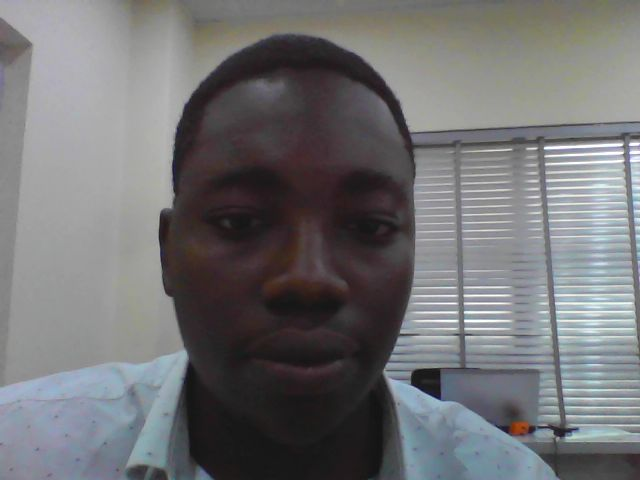

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [ ]:
import cv2

In [ ]:
img = cv2.imread("photo.jpg")

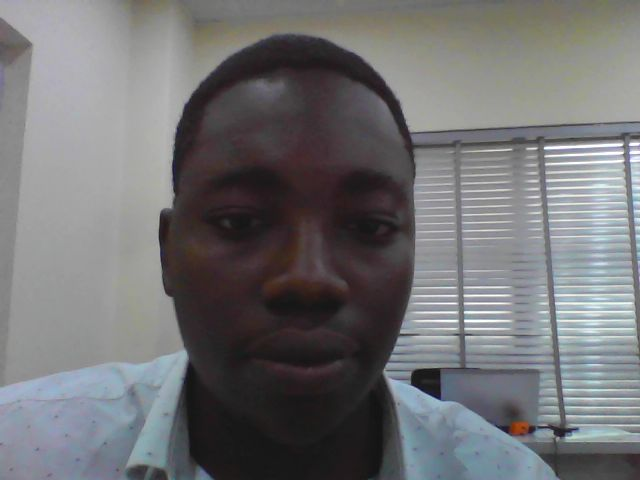

In [ ]:
from google.colab.patches import cv2_imshow
cv2_imshow(img)

In [ ]:
img.shape

(480, 640, 3)

In [ ]:
cv2.resize(img, (150, 150))

array([[[175, 164, 166],
        [174, 161, 163],
        [177, 163, 165],
        ...,
        [107, 114, 111],
        [108, 115, 112],
        [107, 116, 114]],

       [[171, 166, 167],
        [174, 167, 168],
        [175, 166, 167],
        ...,
        [112, 119, 120],
        [109, 117, 118],
        [112, 120, 122]],

       [[167, 168, 168],
        [168, 167, 167],
        [172, 168, 169],
        ...,
        [111, 121, 125],
        [114, 120, 125],
        [116, 120, 125]],

       ...,

       [[144, 133, 128],
        [145, 132, 134],
        [142, 129, 131],
        ...,
        [ 63,  62,  63],
        [ 59,  58,  62],
        [ 54,  51,  60]],

       [[144, 133, 127],
        [145, 131, 133],
        [145, 131, 133],
        ...,
        [ 61,  60,  62],
        [ 58,  56,  62],
        [ 55,  51,  61]],

       [[138, 127, 121],
        [140, 126, 128],
        [141, 127, 129],
        ...,
        [ 61,  60,  64],
        [ 58,  56,  62],
        [ 57,  53,  64]]

In [ ]:
img_2 = cv2.resize(img, (150, 150))

In [ ]:
img_2.shape

(150, 150, 3)

In [ ]:
img_2 = img_2.reshape(1,150,150,3)

In [ ]:
cv2_imshow(img_2)

TypeError: ignored

In [ ]:
real_cam_test = model.predict(img_2)

In [ ]:
pred_labels

array([[ -6859.766 , -20718.617 ,  -9093.456 , ..., -14059.561 ,
        -13053.068 , -12885.059 ],
       [ -8656.424 ,  -7862.171 ,  -6237.0474, ...,  -8547.155 ,
         -8020.093 ,  -8028.8228],
       [ -5867.7334, -18825.588 ,  -9177.792 , ..., -12676.627 ,
        -12094.17  , -11606.126 ],
       [ -6271.857 , -11834.129 ,  -4873.5664, ...,  -8874.083 ,
         -8456.191 ,  -8695.927 ],
       [ -9887.727 , -11293.272 ,  -6476.7915, ...,  -8733.866 ,
         -9023.727 ,  -8705.321 ],
       [ -8803.021 , -17453.746 , -10210.093 , ...,  -9804.311 ,
         -9875.4795, -10041.735 ]], dtype=float32)

In [ ]:
real_cam_test = real_cam_test.argmax()

In [ ]:
real_cam_test

697

In [ ]:
strClasses[698]

'OFFIAH IFEUNYI'

In [ ]:
strClasses[697]

'17CH023236'

In [ ]:
for i in strClasses:
  if i.startswith('16CK020947'):
    print(strClasses.index(i))
  else:
    continue

618


In [ ]:
strClasses[618]

'16CK020947'